# Folder Structures

We saw how we can open individual images by providing an absolute path to each of them. Soon enough, when you have established a workflow, you will want to do batch processing and, by then, manually providing paths to images becomes impractical to say the least. Besides that, having your images organized in a standardized folder strucutre is necessary for machine/deep learning workflows and for sharing your data with the scientific community.

In this notebook, we show the simplest structure to introduce you how to read multiple images from a folder.

In [1]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Car Trunk "Folder Structure"

If you throw your images and data in a single big folder, then your image repository looks like a car trunk. Even though it may be practical at first, you will most likely have to re-arange that. Let's see an example. The folder "Project1_Car_Trunk" looks like this:

```
Project1_Car_Trunk
|
├─ .DS_store
├─ 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png
├─ 0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png
├─ 0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png
├─ 0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png
├─ 0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png
└─ Readme.txt
```

The only good practice in this example is that there is at least a 'Readme' file. Every time you create a new folder, consider right away adding a 'Readme.txt' or 'Readme.md' file there to provide a brief description of what is in this folder.

### Opening multiple images from folders

To open files inside a folder, we create a path to the folder using the class [Path](https://docs.python.org/3/library/pathlib.html#concrete-paths) from the [pathlib](https://docs.python.org/3/library/pathlib.html) library. Other popular library for that is [os](https://docs.python.org/3/library/os.html), but here we use pathlib.

We feed the data repository relative path to the Path class.

In [2]:
data_folder1 = '..\..\data\Folder_Structures\Project1_Car_Trunk'
data_path = Path(data_folder1)

I am on a Windows machine, the pathlib offers classes representing filesystem paths with semantics appropriate for different operating systems.

In [3]:
data_path

WindowsPath('../../data/Folder_Structures/Project1_Car_Trunk')

Now we will iterate over this directory using a `for` loop and print each new path we find inside. We do that by iterating with the method `.iterdir`.

In [4]:
for path in data_path.iterdir():
    print(path)

..\..\data\Folder_Structures\Project1_Car_Trunk\.DS_store.txt
..\..\data\Folder_Structures\Project1_Car_Trunk\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png
..\..\data\Folder_Structures\Project1_Car_Trunk\Readme.txt


Inside the folder, we may have files that are not images. A typical way of filtering them out is to add a condition. Below, we add the condition to take only files whose extention (or suffix) is '.png':

In [5]:
for path in data_path.iterdir():
    if (path.suffix == '.png'):
        print(path)

..\..\data\Folder_Structures\Project1_Car_Trunk\00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png
..\..\data\Folder_Structures\Project1_Car_Trunk\0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png


And that is generally how you can access images in folder: by iterating over items with `for` loops and filtering things with `if` conditions. 

Let's store these paths in a list.

In [6]:
image_path_list = []
for path in data_path.iterdir():
    if (path.suffix == '.png'):
        # Add path to list
        image_path_list += [path]

In [7]:
image_path_list

[WindowsPath('../../data/Folder_Structures/Project1_Car_Trunk/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png'),
 WindowsPath('../../data/Folder_Structures/Project1_Car_Trunk/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png'),
 WindowsPath('../../data/Folder_Structures/Project1_Car_Trunk/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe.png'),
 WindowsPath('../../data/Folder_Structures/Project1_Car_Trunk/0b0d577159f0d6c266f360f7b8dfde46e16fa665138bf577ec3c6f9c70c0cd1e.png'),
 WindowsPath('../../data/Folder_Structures/Project1_Car_Trunk/0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6.png')]

Finally, to demonstrate that we can access these images, let's open and display them. The python `enumerate` function yields pairs containing a count and the item in the list.

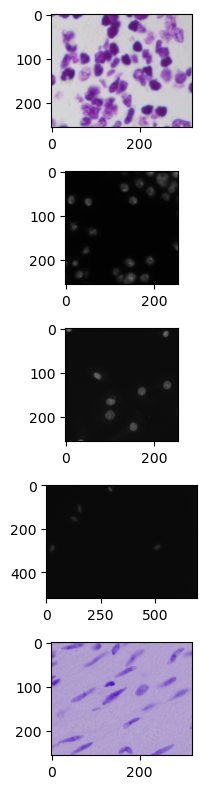

In [8]:
fig, ax = plt.subplots(len(image_path_list), figsize=(6,8))

for count, image_path in enumerate(image_path_list):
    image = imread(image_path)
    ax[count].imshow(image)
    
plt.tight_layout()